# What are we doing?

* Primary objective: exploratory data analysis (EDA)
    * commands to look at dataset properties
    * commands to look at data properties
    * visualization of data
* Secondary objective: begin to explore a research question
    * data join
    * new data visualization and analysis

### In my first demonstration, I used webscraping to select the data I wanted for analysis.  In this demo, we will put ourselves in a much more realistic scenario: the data is provided for you, it's your job to make sense of it.


## THE DATASET: "Blood Donor Registry Data" from Kaggle

https://www.kaggle.com/datasets/tarekmasryo/blood-donor-registry-dataset

(Look at Kaggle, look at what the website says about the datasets, notice this is a SYNTHETIC DATASET)

### Does the dataset being synthetic make it useless?  No, of course not.  It means the code we are using and developing would be categorized as "prototyping" >> using dummy data to make a working product which can later be applied to real data.

This is common in industry and government, especially if the data to be analyzed is sensitive (PHI, PII, etc) or classified (C, S, TS, etc).

In [1]:
# LIBRARIES

import pandas as pd
import numpy as np
import plotly.express as pt
from matplotlib import pyplot as plt
import seaborn as sns

## Note:  this synthetic dataset is already cleaned, i.e., this demo will not go into data cleaning methods.  Generally speaking, this is not the usual expectation--data scientists can spend up to 80% of their time on data cleaning as part of the EDA process.  Not only are you discovering patterns and relationships in the data, you are discovering errors and omissions.

## let's start with looking at the datasets... what do they look like?

In [2]:

# files saved on local system

compat = pd.read_csv('blood_compatibility_lookup.csv')
donation = pd.read_csv('blood_donation_registry_ml_ready.csv')
population = pd.read_csv('blood_population_distribution.csv')

# running notebook on Google Colab w/ input files in the same directory as script
"""
compat = pd.read_csv('./blood_compatibility_lookup.csv')
donation = pd.read_csv('./blood_donation_registry_ml_ready.csv')
population = pd.read_csv('./blood_population_distribution.csv')
"""

"\ncompat = pd.read_csv('./blood_compatibility_lookup.csv')\ndonation = pd.read_csv('./blood_donation_registry_ml_ready.csv')\npopulation = pd.read_csv('./blood_population_distribution.csv')\n"

In [3]:
print("Compatibility Lookup: ")
print(f"1 DataFrame shape: {compat.shape} \n")
print(f"2 columns: \n{compat.columns} \n")
print(f"3 Datatypes: \n{compat.dtypes}")

Compatibility Lookup: 
1 DataFrame shape: (64, 4) 

2 columns: 
Index(['donor_blood_type', 'recipient_blood_type',
       'compatible_for_rbc_transfusion', 'compatibility_level'],
      dtype='object') 

3 Datatypes: 
donor_blood_type                  object
recipient_blood_type              object
compatible_for_rbc_transfusion     int64
compatibility_level               object
dtype: object


In [ ]:
print("Donation Registry: ")
print(f"1 DataFrame shape: {donation.shape} \n")
print(f"2 columns: \n{donation.columns} \n")
print(f"3 Datatypes: \n{donation.dtypes}")

Donation Registry: 
1 DataFrame shape: (30000, 27) 

2 columns: 
Index(['donor_id', 'age', 'sex', 'country_code', 'region', 'blood_type',
       'is_rare_type', 'smoker', 'bmi', 'chronic_condition_flag',
       'eligible_to_donate', 'deferral_reason', 'preferred_site',
       'donation_count_last_12m', 'is_regular_donor',
       'years_since_first_donation', 'lifetime_donation_count',
       'first_donation_year', 'last_donation_date', 'recency_days',
       'donor_age_at_first_donation', 'blood_type_country_prevalence',
       'donation_propensity_score', 'eligibility_status', 'as_of_date',
       'donated_next_6m', 'next_6m_donation_count'],
      dtype='object') 

3 Datatypes: 
donor_id                           int64
age                                int64
sex                               object
country_code                      object
region                            object
blood_type                        object
is_rare_type                       int64
smoker                 

In [ ]:
print("Population Distribution: ")
print(f"1 DataFrame shape: {population.shape} \n")
print(f"2 columns: \n{population.columns} \n")
print(f"3 Datatypes: \n{population.dtypes}")

Population Distribution: 
1 DataFrame shape: (39, 12) 

2 columns: 
Index(['country_code', 'region', 'population_size', 'p_o_pos', 'p_o_neg',
       'p_a_pos', 'p_a_neg', 'p_b_pos', 'p_b_neg', 'p_ab_pos', 'p_ab_neg',
       'rh_negative_rate'],
      dtype='object') 

3 Datatypes: 
country_code         object
region               object
population_size       int64
p_o_pos             float64
p_o_neg             float64
p_a_pos             float64
p_a_neg             float64
p_b_pos             float64
p_b_neg             float64
p_ab_pos            float64
p_ab_neg            float64
rh_negative_rate    float64
dtype: object


### now that we know what the datasets look like, what does the data itself look like?

In [9]:
compat.head(10) # let's look at the first five rows of the dataset >> note column headers, zero-indexing

,donor_blood_type,recipient_blood_type,compatible_for_rbc_transfusion,compatibility_level
0,O+,O+,1,ideal
1,O+,O-,0,incompatible
2,O+,A+,1,acceptable
3,O+,A-,0,incompatible
4,O+,B+,1,acceptable
5,O+,B-,0,incompatible
6,O+,AB+,1,acceptable
7,O+,AB-,0,incompatible
8,O-,O+,1,acceptable
9,O-,O-,1,ideal


In [10]:
compat['donor_blood_type'].unique() # let's see the unique values for this property

array(['O+', 'O-', 'A+', 'A-', 'B+', 'B-', 'AB+', 'AB-'], dtype=object)

In [11]:
compat['donor_blood_type'].value_counts()

,count
donor_blood_type,
O+,8
O-,8
A+,8
A-,8
B+,8
B-,8
AB+,8
AB-,8


In [13]:
univ_donor = compat['donor_blood_type'] == "O-"
univ_donor  # this is a boolean mask, in and of itself, not overly helpful, but...

,donor_blood_type
0,False
1,False
2,False
3,False
4,False
...,...
59,False
60,False
61,False
62,False


In [14]:
#univ_donor = compat['donor_blood_type'] == "O-"
compat[univ_donor] # use the boolean mask as an index and you get a slice of the dataset

,donor_blood_type,recipient_blood_type,compatible_for_rbc_transfusion,compatibility_level
8,O-,O+,1,acceptable
9,O-,O-,1,ideal
10,O-,A+,1,acceptable
11,O-,A-,1,acceptable
12,O-,B+,1,acceptable
13,O-,B-,1,acceptable
14,O-,AB+,1,acceptable
15,O-,AB-,1,acceptable


In [15]:
# explore the donation registry
donation.head() # we still have those stupid ellipses...

,donor_id,age,sex,country_code,region,blood_type,is_rare_type,smoker,bmi,chronic_condition_flag,...,first_donation_year,last_donation_date,recency_days,donor_age_at_first_donation,blood_type_country_prevalence,donation_propensity_score,eligibility_status,as_of_date,donated_next_6m,next_6m_donation_count
0,1,55,F,MX,Americas,A+,0,1,27.2,0,...,2023,2023-04-05,636,54,0.232140,19.4,eligible,2024-12-31,0,0
1,2,47,F,CN,Asia,B+,0,0,16.0,1,...,2013,2022-04-18,988,36,0.214937,2.8,permanent_deferral,2024-12-31,0,0
2,3,49,F,UG,Africa,O+,0,0,21.8,0,...,2014,2021-07-26,1254,39,0.461575,27.5,eligible,2024-12-31,1,1
3,4,45,F,JP,Asia,O+,0,1,29.0,0,...,2018,2024-01-17,349,39,0.386886,36.1,eligible,2024-12-31,0,0
4,5,52,F,TR,MENA,A+,0,1,25.0,1,...,2017,2021-08-15,1234,45,0.260613,2.8,permanent_deferral,2024-12-31,0,0


In [ ]:

donation.head(3).T  # so I use .T to transpose the DataFrame and give it the argument 3 for 3 "rows"
# now we can see all of the columns and start to get an idea of what data we are looking at

,0,1,2
donor_id,1,2,3
age,55,47,49
sex,F,F,F
country_code,MX,CN,UG
region,Americas,Asia,Africa
blood_type,A+,B+,O+
is_rare_type,0,0,0
smoker,1,0,0
bmi,27.2,16.0,21.8
chronic_condition_flag,0,1,0


In [50]:
# make a line plot, cumulative sum of first_donation_year

line_frame = donation['first_donation_year'].reset_index()
line_frame = line_frame.drop('index', axis=1)
line_frame = line_frame.groupby('first_donation_year').size() # NOTE: line_frame is already a pd.Series()
don_agg = line_frame.cumsum()
line_frame = pd.DataFrame(line_frame, columns=['num'])
line_frame['don_agg'] = don_agg
line_frame = line_frame.reset_index()
line_frame.head(10)

,first_donation_year,num,don_agg
0,1989,45,45
1,1990,45,90
2,1991,54,144
3,1992,62,206
4,1993,63,269
5,1994,68,337
6,1995,93,430
7,1996,61,491
8,1997,97,588
9,1998,106,694


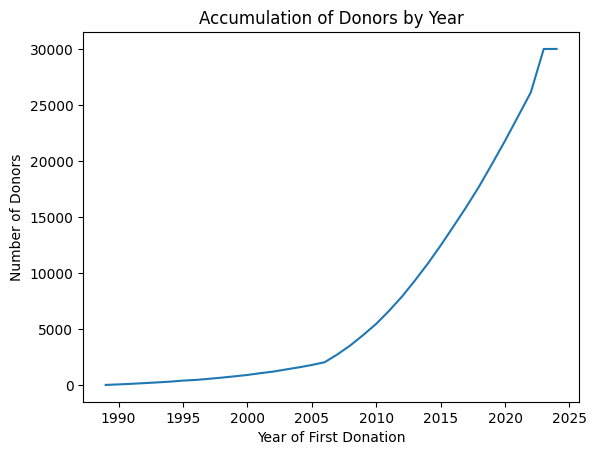

In [49]:
sns.lineplot(x='first_donation_year', y='don_agg', data=line_frame)
plt.xlabel('Year of First Donation')
plt.ylabel('Number of Donors')
plt.title('Accumulation of Donors by Year')
plt.show()

In [ ]:
last_don = donation['last_donation_date'] # a pd.Series of strings
#last_don
last_don_1 = pd.to_datetime(arg=last_don, yearfirst=True, format='%Y-%m-%d') # now a pd.Series of datetimes/timestamps 

#last_don_1_y = last_don_1.year

last_don_2 = pd.DataFrame(last_don_1, columns=['last_donation_date'])
last_don_2['last_donation_year'] = last_don_2.last_donation_date.dt.year
last_don_2

,last_donation_date,last_donation_year
0,2023-04-05,2023
1,2022-04-18,2022
2,2021-07-26,2021
3,2024-01-17,2024
4,2021-08-15,2021
...,...,...
29995,2022-07-09,2022
29996,2024-11-29,2024
29997,2018-12-01,2018
29998,2023-10-23,2023


In [75]:
print(f"The max year: {np.max(last_don_2['last_donation_year'])}")
print(f"The min year: {np.min(last_don_2['last_donation_year'])}")

The max year: 2024
The min year: 2007


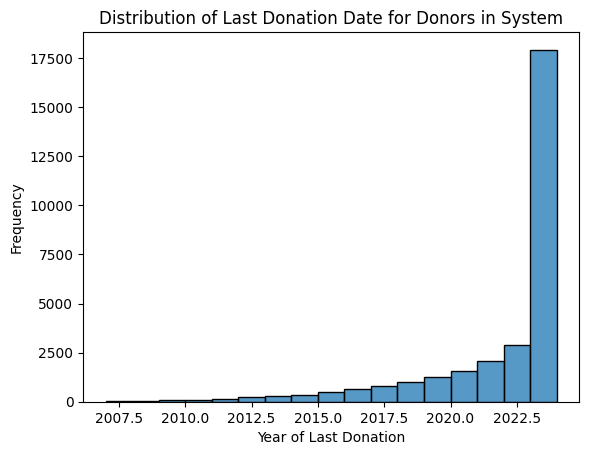

In [ ]:
# NOTE: I thought I could cheat and basically make this a bar chart while also demonstrating the ability to make a histogram.
#   I realize a histogram is not the idea visualization to examine the distribution of last_donation_date, but again: this
#   is more about a demo.  I would use a bar chart.

# make a histogram of last_donation_date
sns.histplot(last_don_2.last_donation_year, bins=17) # kind of cheating. demonstrating a histogram instead of a barplot bc I already did plenty of those.
plt.xlabel('Year of Last Donation')
plt.ylabel('Frequency')
plt.title('Distribution of Last Donation Date for Donors in System')
plt.show()

In [16]:
# bar plot of donor blood types

# first isolate data
donation['blood_type'] = donation['blood_type'].astype('category')
#donation['blood_type'] = donation['blood_type'].cat.reorder_categories(['strongly agree', 'agree', 'disagree', 'strongly disagree'])
#               # whatever order you want, list of strings
bars = donation['blood_type'].value_counts().sort_index()
bars

,count
blood_type,
A+,7718
A-,797
AB+,1935
AB-,355
B+,5198
B-,571
O+,12649
O-,777


Text(0.5, 1.0, 'Blood Types Amongst Donors in Database')

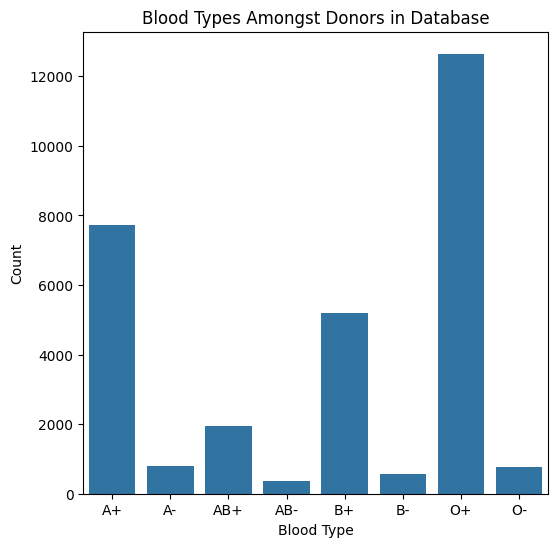

In [ ]:
# then plot

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x=bars.index, y=bars.values)
plt.ylabel('Count')
plt.xlabel('Blood Type')
plt.title('Blood Types Amongst Donors in Database')

In [18]:
# bar plot of eligibility_status

# first isolate data
donation['eligibility_status'] = donation['eligibility_status'].astype('category')
#donation['eligibility_status'] = donation['eligibility_status'].cat.reorder_categories(['eligible', 'permanent_deferral', 'temporary_deferral'])
donation['eligibility_status'] = donation['eligibility_status'].cat.reorder_categories(['eligible', 'temporary_deferral', 'permanent_deferral'])
#               # whatever order you want, list of strings
bars2 = donation['eligibility_status'].value_counts().sort_index()
bars2

,count
eligibility_status,
eligible,24915
temporary_deferral,628
permanent_deferral,4457


Text(0.5, 1.0, 'Donor Eligibility')

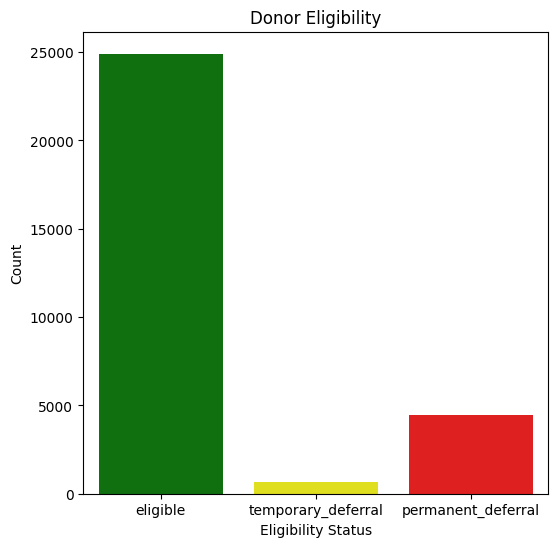

In [19]:
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x=bars2.index, y=bars2.values, hue=bars2.index, palette=['green', 'yellow', 'red']) # leadership loves a stoplight color scheme
plt.ylabel('Count')
plt.xlabel('Eligibility Status')
plt.title('Donor Eligibility')

"\nanes_plot = anes.groupby(['partyID', 'sex', 'confecon']).size().reset_index()\nanes_plot = anes_plot.rename({0:'count'}, axis=1)\n\ng = sns.FacetGrid(anes_plot, row = 'sex', col = 'partyID', hue = 'partyID')\ng.map(plt.barh, 'confecon', 'count')\n"

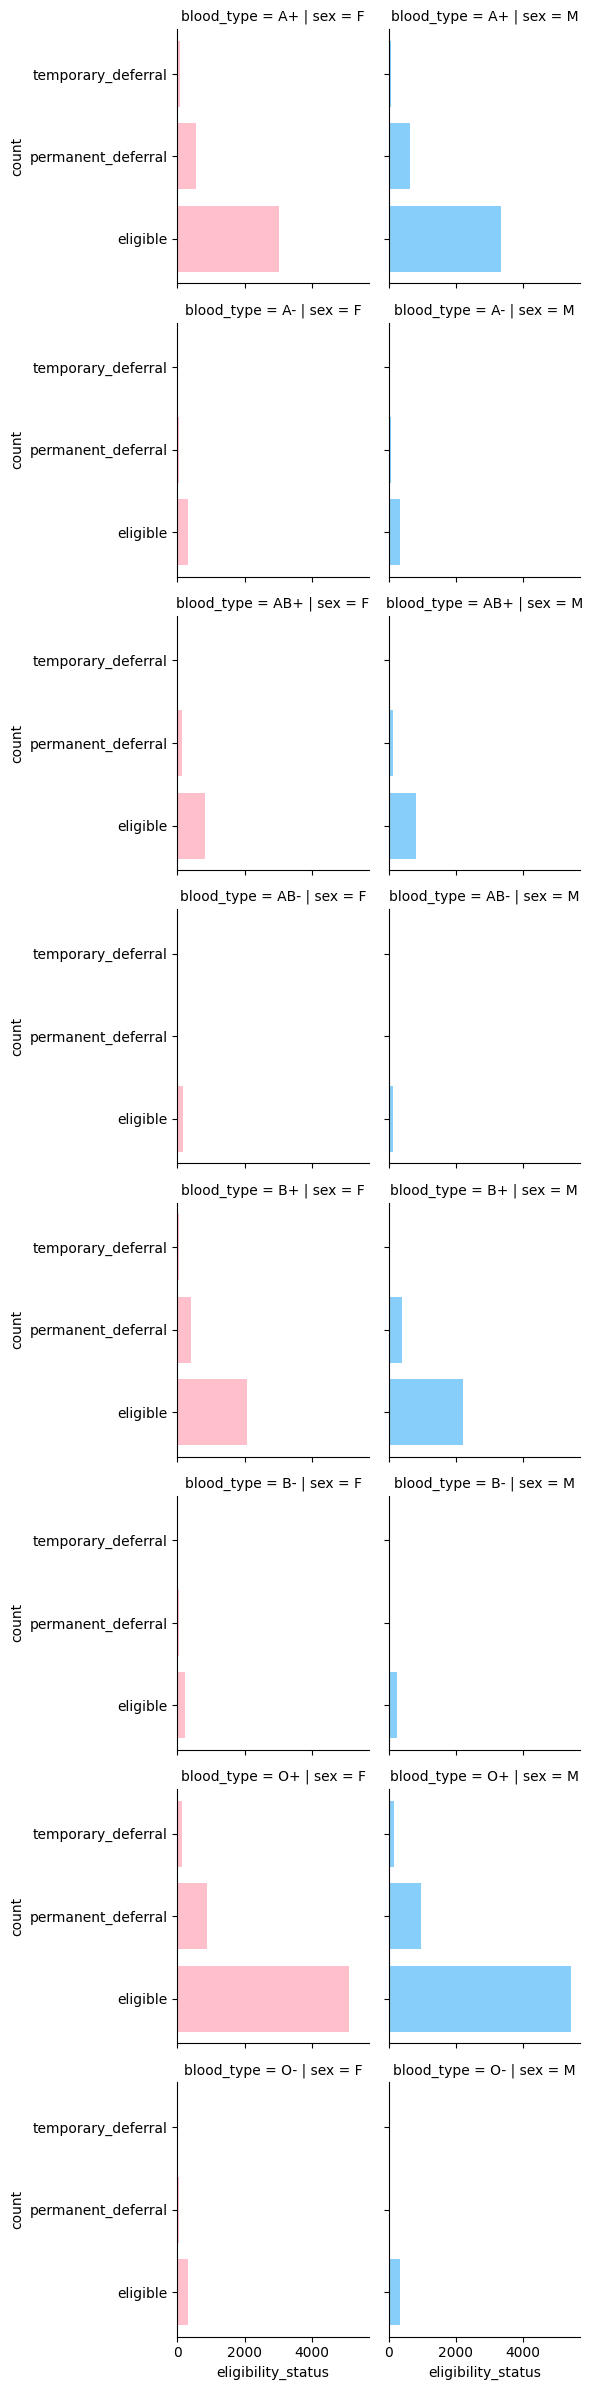

In [4]:
## facet grid of elibility status by blood type (i.e. grid is for blood types, each
# plot shows bar plots of elibility)

temp = donation.groupby(['blood_type', 'sex', 'eligibility_status']).size().reset_index()
temp = temp.rename({0:'count'}, axis=1)

grid = sns.FacetGrid(temp, row='blood_type', col='sex', hue='sex', palette = ['pink', 'lightskyblue'])

# for colors, I just googled 'matplotlib colors' and used
# https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

grid.map(plt.barh, 'eligibility_status', 'count') # (plot type, x-axis, y-axis)

"""
anes_plot = anes.groupby(['partyID', 'sex', 'confecon']).size().reset_index()
anes_plot = anes_plot.rename({0:'count'}, axis=1)

g = sns.FacetGrid(anes_plot, row = 'sex', col = 'partyID', hue = 'partyID')
g.map(plt.barh, 'confecon', 'count')
"""

In [20]:
# explore the population dataframe
population.head()

,country_code,region,population_size,p_o_pos,p_o_neg,p_a_pos,p_a_neg,p_b_pos,p_b_neg,p_ab_pos,p_ab_neg,rh_negative_rate
0,GB,Europe,108328085,0.373554,0.056414,0.305723,0.064970,0.109383,0.023904,0.043710,0.022342,0.167630
1,FR,Europe,46738553,0.330104,0.071148,0.336667,0.072512,0.095727,0.023263,0.049985,0.020594,0.187517
2,DE,Europe,10585377,0.368965,0.058713,0.333185,0.060172,0.105269,0.013257,0.038940,0.021499,0.153641
3,IT,Europe,69157848,0.361326,0.053443,0.315731,0.098130,0.086372,0.029235,0.033287,0.022476,0.203284
4,ES,Europe,151099456,0.383377,0.069177,0.312493,0.061924,0.070285,0.026869,0.061681,0.014194,0.172164


In [ ]:
population['region'].value_counts()

,count
region,
Asia,10
Europe,8
MENA,8
Americas,7
Africa,6


Do what? "MENA" isn't one of the 7 continents...

Google 'region MENA' >> https://en.wikipedia.org/wiki/Middle_East_and_North_Africa

And we can see the 'Americas' are combined, so clearly this is not by continent.  We do have the country_code property, so we could re-map the data and sort by continent if we wanted/needed to.  Its current sorting by region is not an issue, just something to be aware of.

## now that we have some knowledge about our data, we can start to look at a focused research question

### e.g., if O- is the universal donor, how many of our donors have it?

In [21]:
# in a way, we already have the data to answer this question
print(f"Shape of donations table: {donation.shape}")
print(f"There are {donation.shape[0]} donors in the database") # shape is a tuple, the first element (indexed zero) indicates number of rows

donation['blood_type'].value_counts()

Shape of donations table: (30000, 27)
There are 30000 donors in the database


,count
blood_type,
O+,12649
A+,7718
B+,5198
AB+,1935
A-,797
O-,777
B-,571
AB-,355


### what is the breakdown on eligibility status of these O- donors?

In [22]:
#donation['blood_type'] = donation['blood_type'].astype('category')
donation['eligibility_status'] = donation['eligibility_status'].astype('category')
#donation['eligibility_status'] = donation['eligibility_status'].cat.reorder_categories(['eligible', 'temporary_deferral', 'permanent_deferral'])
mask = donation['blood_type'] == 'O-'
temp = donation[mask]
bars3 = temp['eligibility_status'].value_counts().sort_index()
bars3

# why is it in this annoying non-intuitive order?  Because the computer doesn't understand the intuition, it CAN understand alphabetical order.


,count
eligibility_status,
eligible,658
temporary_deferral,17
permanent_deferral,102


Text(0.5, 1.0, 'Blood Type O- Donor Eligibility')

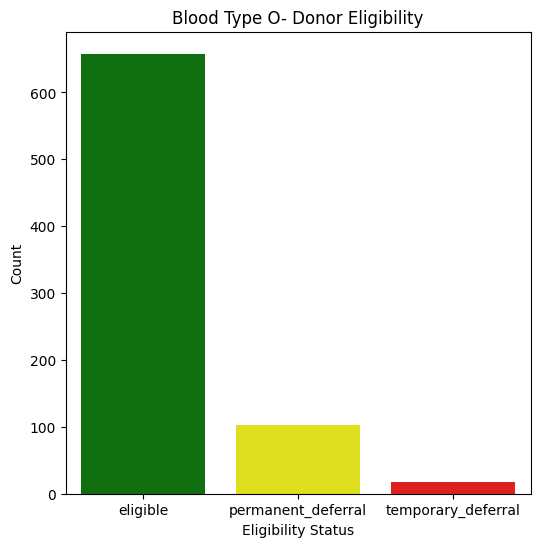

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x=bars3.index, y=bars3.values, hue=bars3.index, palette=['green', 'yellow', 'red']) # yikes, make sure you re-order the categories. Devil's in the details.
plt.ylabel('Count')
plt.xlabel('Eligibility Status')
plt.title('Blood Type O- Donor Eligibility')

### I have XXX type blood, I want to know how many people in the registry are "acceptable" or "ideal" for blood donation

A donor's 'blood_type' is a property of the blood_donation_registry_ml_ready file; but 'compatibility_level' is a property of the blood_compatibility_lookup file.  We need to combine ("join") these two datasets.

In [27]:
blood_needed = 'A-'
target_type = compat['donor_blood_type'] == blood_needed # I just picked A-, we can look at something else
#target_type
compat[target_type] # this is called 'masking'

,donor_blood_type,recipient_blood_type,compatible_for_rbc_transfusion,compatibility_level
24,A-,O+,0,incompatible
25,A-,O-,0,incompatible
26,A-,A+,1,acceptable
27,A-,A-,1,ideal
28,A-,B+,0,incompatible
29,A-,B-,0,incompatible
30,A-,AB+,1,acceptable
31,A-,AB-,1,acceptable


In [28]:
# perform the join
newTable = pd.merge(left=donation, right=compat, left_on='blood_type', right_on='donor_blood_type', how='left')
newTable

,donor_id,age,sex,country_code,region,blood_type,is_rare_type,smoker,bmi,chronic_condition_flag,...,blood_type_country_prevalence,donation_propensity_score,eligibility_status,as_of_date,donated_next_6m,next_6m_donation_count,donor_blood_type,recipient_blood_type,compatible_for_rbc_transfusion,compatibility_level
0,1,55,F,MX,Americas,A+,0,1,27.2,0,...,0.232140,19.4,eligible,2024-12-31,0,0,A+,O+,0,incompatible
1,1,55,F,MX,Americas,A+,0,1,27.2,0,...,0.232140,19.4,eligible,2024-12-31,0,0,A+,O-,0,incompatible
2,1,55,F,MX,Americas,A+,0,1,27.2,0,...,0.232140,19.4,eligible,2024-12-31,0,0,A+,A+,1,ideal
3,1,55,F,MX,Americas,A+,0,1,27.2,0,...,0.232140,19.4,eligible,2024-12-31,0,0,A+,A-,0,incompatible
4,1,55,F,MX,Americas,A+,0,1,27.2,0,...,0.232140,19.4,eligible,2024-12-31,0,0,A+,B+,0,incompatible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,30000,46,M,UG,Africa,O+,0,0,28.0,0,...,0.461575,70.2,eligible,2024-12-31,1,2,O+,A-,0,incompatible
239996,30000,46,M,UG,Africa,O+,0,0,28.0,0,...,0.461575,70.2,eligible,2024-12-31,1,2,O+,B+,1,acceptable
239997,30000,46,M,UG,Africa,O+,0,0,28.0,0,...,0.461575,70.2,eligible,2024-12-31,1,2,O+,B-,0,incompatible
239998,30000,46,M,UG,Africa,O+,0,0,28.0,0,...,0.461575,70.2,eligible,2024-12-31,1,2,O+,AB+,1,acceptable


A full join operation would give us an enumerated table with 64 rows (from the compatibility table) per row in the donor table.

By joining "blood_type" on "donor_blood_type" we narrow that to 8 compatibility rows per row in the donor table, i.e., the compatibility level of the donor's blood type for each poteintial recipient blood type

In [29]:
# I want to narrow it further to the rows where the recipient_blood_type matches blood_needed

mask2 = (newTable['recipient_blood_type'] == blood_needed)
temp = newTable[mask2]

# look at the table now
temp

,donor_id,age,sex,country_code,region,blood_type,is_rare_type,smoker,bmi,chronic_condition_flag,...,blood_type_country_prevalence,donation_propensity_score,eligibility_status,as_of_date,donated_next_6m,next_6m_donation_count,donor_blood_type,recipient_blood_type,compatible_for_rbc_transfusion,compatibility_level
3,1,55,F,MX,Americas,A+,0,1,27.2,0,...,0.232140,19.4,eligible,2024-12-31,0,0,A+,A-,0,incompatible
11,2,47,F,CN,Asia,B+,0,0,16.0,1,...,0.214937,2.8,permanent_deferral,2024-12-31,0,0,B+,A-,0,incompatible
19,3,49,F,UG,Africa,O+,0,0,21.8,0,...,0.461575,27.5,eligible,2024-12-31,1,1,O+,A-,0,incompatible
27,4,45,F,JP,Asia,O+,0,1,29.0,0,...,0.386886,36.1,eligible,2024-12-31,0,0,O+,A-,0,incompatible
35,5,52,F,TR,MENA,A+,0,1,25.0,1,...,0.260613,2.8,permanent_deferral,2024-12-31,0,0,A+,A-,0,incompatible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239963,29996,44,F,MA,MENA,A-,1,0,22.8,0,...,0.030138,25.8,eligible,2024-12-31,0,0,A-,A-,1,ideal
239971,29997,31,M,ES,Europe,A+,0,0,24.8,0,...,0.312493,46.6,eligible,2024-12-31,1,1,A+,A-,0,incompatible
239979,29998,66,F,KE,Africa,B+,0,1,28.1,0,...,0.181184,6.0,permanent_deferral,2024-12-31,0,0,B+,A-,0,incompatible
239987,29999,39,F,IN,Asia,O+,0,0,24.1,0,...,0.401338,47.4,eligible,2024-12-31,1,1,O+,A-,0,incompatible


In [ ]:
slices = temp.groupby('compatibility_level').size()
slices

,0
compatibility_level,
acceptable,777
ideal,797
incompatible,28426


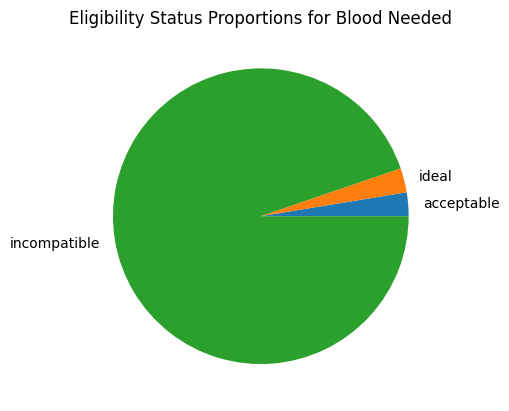

In [ ]:
fig = plt.pie(slices, labels=slices.index)
plt.title('Eligibility Status Proportions for Blood Needed')

plt.show()

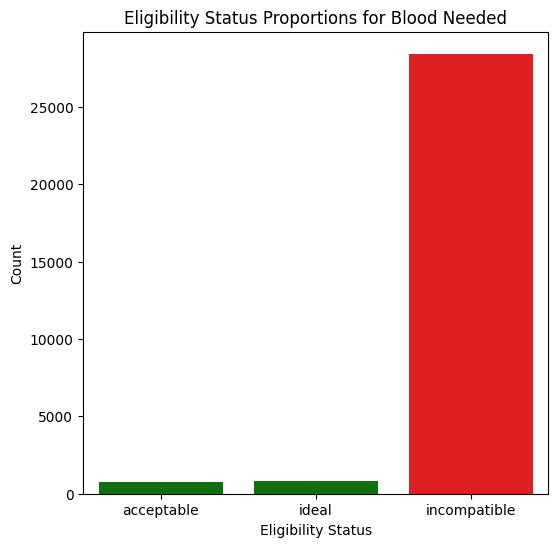

In [ ]:
# now make a bar chart to show proportions

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x=slices.index, y=slices.values, hue=slices.index, palette=['green', 'green', 'red'])
plt.ylabel('Count')
plt.xlabel('Eligibility Status')
plt.title('Eligibility Status Proportions for Blood Needed')

plt.show()

### is a pie chart a useful visual?  Like so many things in life... it depends.  What does the customer want?

### EDA is an open-ended process, we need to find the balance between gaining a thorough understanding of the data while not spending too much time getting into the weeds.

### Keep the broader context in mind as we search for "enough" of an understanding so we can start turning the data into something useful

## AND speaking of context, remember the LIMITATIONS of your data... this is a simulated dataset, and even if it wasn't--would this dataset be indicative of the entire global population?  Or does it just represent a cross-section of the global population who donated blood?